In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import cv2
from os import listdir
from os.path import isfile, join
import string
import re
import nltk
import keras
from keras import layers
from keras import Input
from keras.models import Model
from keras import models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt


from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

In [ ]:
#upload pneumonia-symptoms excel sheet
from google.colab import files
uploaded=files.upload()

Saving pneumonia - symptoms 2.xlsx to pneumonia - symptoms 2 (2).xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
img_size = 150
def get_training_data(data_dir):
    data = []
    path = os.path.join(data_dir)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        data.append([resized_arr,img])
      except Exception as e:
          print(e)
    return np.array(data)

In [ ]:
x_images1=get_training_data('/content/drive/MyDrive/chest_xrays/train/PNEUMONIA')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [ ]:
x_images2=get_training_data('/content/drive/MyDrive/chest_xrays/train/NORMAL')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data1(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
val = get_training_data1('/content/drive/MyDrive/chest_xrays/val')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:

x_val = []
y_val = []

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

x_val = np.array(x_val) / 255
x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [ ]:
import io
df_symptoms=pd.read_excel(io.BytesIO(uploaded['pneumonia - symptoms 2 (2).xlsx']))

In [ ]:
df_symptoms.fillna(value='', inplace=True)
df_symptoms=df_symptoms.drop(['Pneumonia'],axis=1)


In [ ]:
x_symptoms=df_symptoms
y_label=[]
x_images=[]
c=0
for i in x_images1:
  c=c+1
  x_images.append(i[0])
  y_label.append(1)
for i in x_images2:
  c=c+1
  x_images.append(i[0])
  y_label.append(0)

In [ ]:
y_label=pd.DataFrame(y_label)
type(y_label)

pandas.core.frame.DataFrame

In [ ]:
x_images=np.array(x_images,dtype=float)/255

x_images = x_images.reshape(-1, img_size, img_size, 1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_images)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


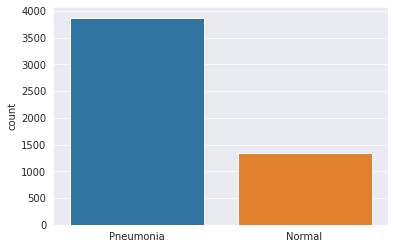

In [ ]:
l = []
for i in y_label[0]:
    if(i == 1):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

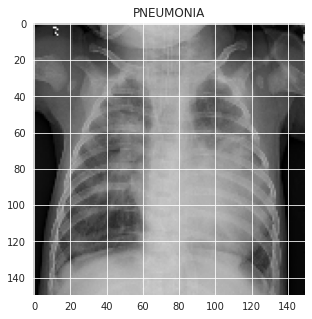

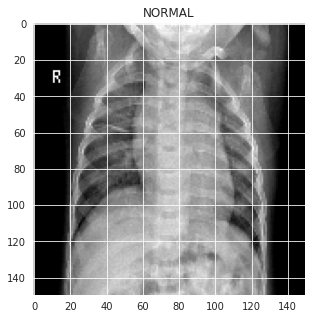

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(x_images1[4][0], cmap='gray')
plt.title("PNEUMONIA")

plt.figure(figsize = (5,5))
plt.imshow(x_images2[2][0], cmap='gray')
plt.title("NORMAL")

In [ ]:
split = train_test_split(x_symptoms, x_images,y_label, test_size=0.3, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX,y_train,y_test) = split

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(trainAttrX, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
module_wrapper_31 (ModuleWra (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 38, 38, 256)      

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor="val_accuracy", patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


In [ ]:
history = model.fit_generator(datagen.flow(trainImagesX,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val,y_val) ,
                                  callbacks = [learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
115/115 [==============================] - 10s 72ms/step - loss: 13.3040 - accuracy: 0.6980 - val_loss: 124.6674 - val_accuracy: 0.5000
Epoch 2/12
115/115 [==============================] - 8s 68ms/step - loss: 0.5764 - accuracy: 0.8349 - val_loss: 173.0875 - val_accuracy: 0.5000
Epoch 3/12
115/115 [==============================] - 8s 68ms/step - loss: 0.5345 - accuracy: 0.8516 - val_loss: 45.7535 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
115/115 [==============================] - 8s 68ms/step - loss: 0.2943 - accuracy: 0.8966 - val_loss: 64.3119 - val_accuracy: 0.5000
Epoch 5/12
115/115 [==============================] - 8s 68ms/step - loss: 0.2890 - accuracy: 0.9040 - val_loss: 40.3497 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 6/12
115/115 [==============================] - 8s 68ms/step - loss: 0.2671 - accuracy: 0.9254 - val_loss: 1

In [ ]:
print("Loss of the model is - " , model.evaluate(testImagesX,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(testImagesX,y_test)[1]*100 , "%")

49/49 [==============================] - 1s 17ms/step - loss: 0.2848 - accuracy: 0.9278
Loss of the model is -  0.2847895622253418
49/49 [==============================] - 1s 13ms/step - loss: 0.2848 - accuracy: 0.9278
Accuracy of the model is -  92.77955293655396 %


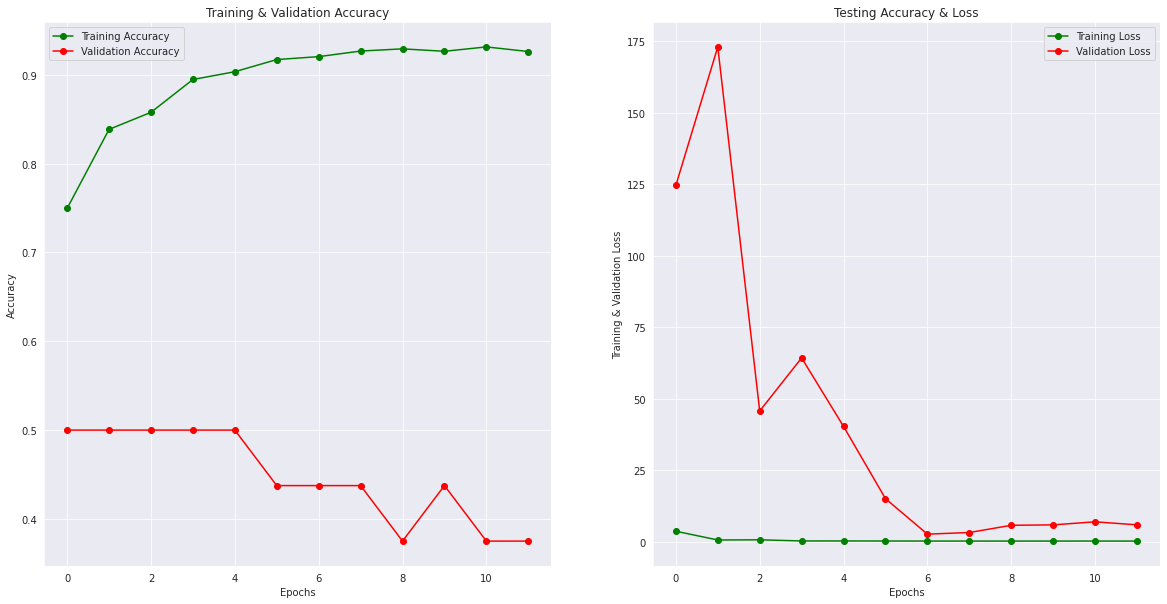

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


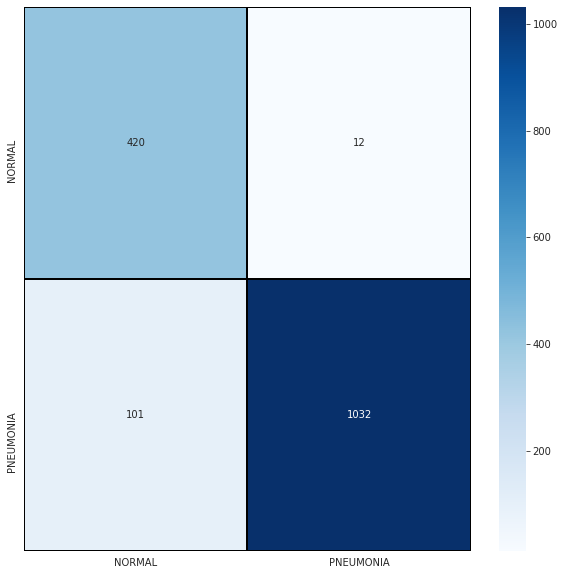

In [ ]:
labels=['NORMAL','PNEUMONIA']
predictions = model.predict_classes(testImagesX)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
print(classification_report(y_test,predictions , target_names = ['Normal (Class 0)','Pneumonia (Class 1)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       0.81      0.97      0.88       432
Pneumonia (Class 1)       0.99      0.91      0.95      1133

           accuracy                           0.93      1565
          macro avg       0.90      0.94      0.91      1565
       weighted avg       0.94      0.93      0.93      1565



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
model.save("CNNodel.h5")

NameError: ignored

In [ ]:
_img_pred = model.predict_classes(testImagesX)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
prob1=model.predict_proba(testImagesX)*100


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
prob2=LR_model.predict_proba(testAttrX)*100


In [ ]:
prob = (2*(prob1)+1*(prob2))/3

In [ ]:
pred=[]
for i in range(len(testImagesX)):
  if prob[i][1]>=50:
    pred.append(1)
  else:
    pred.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,y_test)
print(acc)

0.9699680511182108


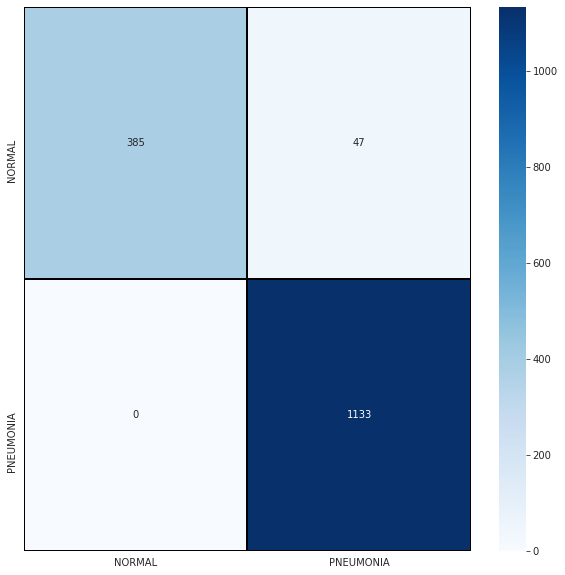

In [ ]:
labels=['NORMAL','PNEUMONIA']
cm = confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
print(classification_report(y_test,pred , target_names = ['Normal (Class 0)','Pneumonia (Class 1)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       1.00      0.89      0.94       432
Pneumonia (Class 1)       0.96      1.00      0.98      1133

           accuracy                           0.97      1565
          macro avg       0.98      0.95      0.96      1565
       weighted avg       0.97      0.97      0.97      1565

